In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')


In [2]:
import pandas as pd
data = pd.read_csv('sunspots.txt', sep="\t", names=["Month", "Sunspot number"])

sunspots = data['Sunspot number']
months = data['Month']

In [3]:
equalities = months.values == np.arange(len(data))
set(equalities)
# so we have data for precisely every month

{True}

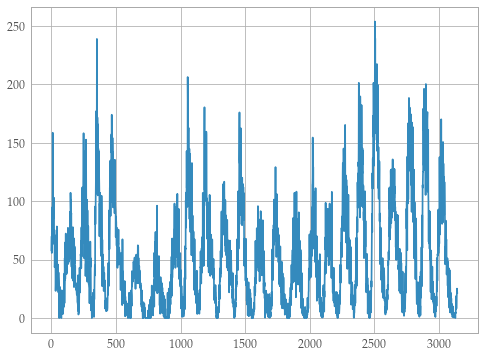

In [4]:
plt.plot(sunspots)

In [5]:
def DFT(data):
  N = len(data)
  kmax = N // 2 + 1
  
  cs = []
  for k in range(kmax):
    spinner = np.exp(-1j / N * 2 * np.pi * k * np.arange(N))
    
    cs.append(np.sum(spinner * data))
  return (np.array(cs))

In [6]:
%timeit fft = np.fft.rfft(sunspots)

108 µs ± 6.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit dft = DFT(sunspots)

649 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0, 0.5, 'Amplitude [pure number, log scale]')

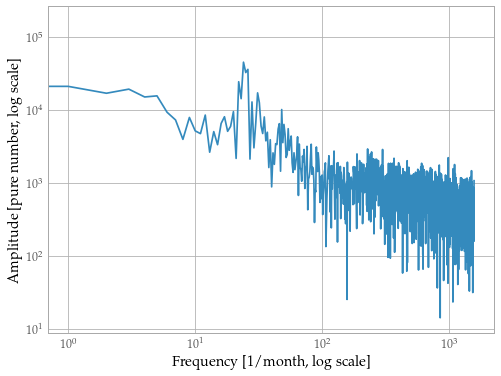

In [8]:
ft = DFT(sunspots)
# the result for the fft is the same

# note that we put a 2π factor in the exponential: 
# the output is then a function of frequency, 
# not of angular velocity

plt.loglog(np.abs(ft))
plt.xlabel('Frequency [$1 / \\text{month}$, log scale]')
plt.ylabel('Amplitude [pure number, log scale]')

Text(0, 0.5, 'Amplitude [pure number, symmetric log scale]')

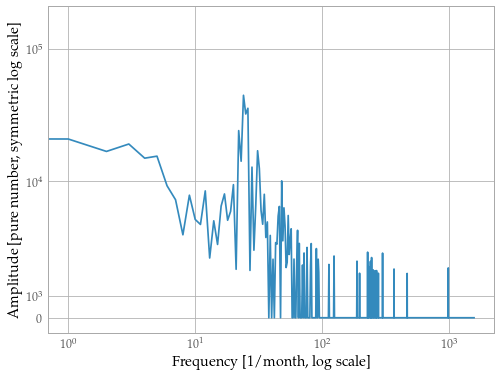

In [9]:
# denoising: we discard the terms in the transform 
# which have frequencies less than a certain threshold

threshold = 2e3
dnft = np.where(abs(ft)>threshold, ft, 0)
plt.loglog(abs(dnft))
plt.yscale('symlog', linthreshy = threshold, linscaley=.3)
plt.xlabel('Frequency [$1 / \\text{month}$, log scale]')
plt.ylabel('Amplitude [pure number, symmetric log scale]')

Text(0, 0.5, 'Number of sunspots [pure number]')

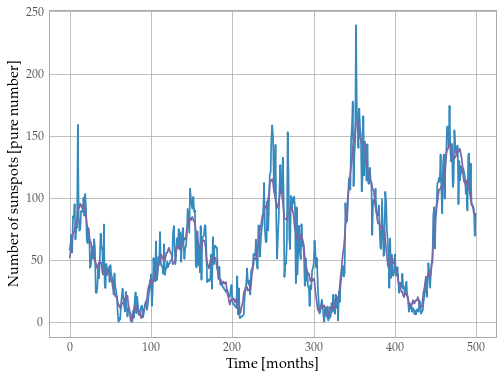

In [10]:
denoised_sunspots = np.fft.irfft(dnft)
plt.plot(sunspots[:500])
plt.plot(denoised_sunspots[:500])
plt.xlabel('Time [months]')
plt.ylabel('Number of sunspots [pure number]')

The main frequency is 24.5+/-1.9
This corresponds to a period of 128+/-10 months, or 10.69+/-0.83 years.


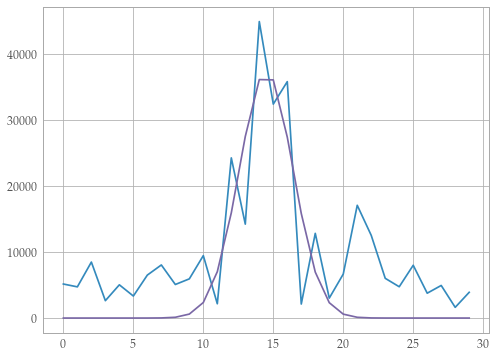

In [11]:
from scipy.optimize import curve_fit
from scipy.stats import norm
import uncertainties as unc

gauss = lambda x, c, m, s : c*norm.pdf(x, loc=m, scale=s)

ind_min = 10
ind_max = 40
xs = np.arange(ind_min, ind_max)

peak_data = abs(ft[ind_min:ind_max])
plt.plot(peak_data)

popt, pcov = curve_fit(gauss, xs, peak_data, p0=[30000., 25., 5.])
plt.plot(xs-ind_min, gauss(xs, *popt))
frequency = unc.ufloat(popt[1], popt[2])

print(f'The main frequency is {frequency}')
N= len(data)
print(f'This corresponds to a period of {N/frequency} months, or {N/frequency/12.:.2f} years.')